In [18]:
# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
%pip install transformers torch scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Í¥ÄÎ†®
import pandas as pd
import glob
import os
from tqdm import tqdm

# KC-BERT Í∞êÏÑ± Î∂ÑÎ•ò ÏòàÏ∏° Í¥ÄÎ†®
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

# Í≤ΩÍ≥† Î¨¥Ïãú
import warnings
warnings.filterwarnings("ignore")

c:\Users\smhrd\AppData\Local\Programs\Orange\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. data Ìè¥Îçî ÎÇ¥ Î™®Îì† CSV ÌååÏùº Î°úÎìú Î∞è Ï†ïÎ≥¥ ÌôïÏù∏
- df_list = Í∞Å CSV ÌååÏùºÏùÑ DataFrameÏúºÎ°ú ÏùΩÏñ¥ ÏÉùÏÑ±Ìïú Î¶¨Ïä§Ìä∏
- df_list Í∏∏Ïù¥ = data Ìè¥Îçî ÎÇ¥ CSV ÌååÏùº Ïàò (7)

In [3]:
# data Ìè¥Îçî ÏïàÏùò Î™®Îì† CSV ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
csv_files = glob.glob(os.path.join('./data', '*.csv'))

# Í∞Å ÌååÏùºÏùÑ DataFrameÏúºÎ°ú ÏùΩÍ≥† Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
df_list = [pd.read_csv(file) for file in csv_files]
df_list

[          id       brand                                          name  \
 0     607298  ÎπÑÏóêÏä§ÌÅêÌã∞Î∞îÏù¥ÌÅ¥ÎûòÏãú                             375 Ïõ∞Îçò ÎçîÎπÑ Íµ¨Îëê Î£®ÏãúÎ∏îÎûô   
 1    4062428        Îã•ÌÑ∞ÎßàÌã¥                      1461 3ÌôÄ Î™®ÎÖ∏ Î∏îÎûô / 14345001   
 2    1815709       Î°úÎß®Ìã±Î¨¥Î∏å                      Î≤†Ïù¥Ïä§Î®ºÌä∏ ÎçîÎπÑ R24M042 (BX Î∏îÎûô)   
 3    1021359    ÎßàÏù¥Ïï†ÎØ∏ÌîÑÎ°úÏ†ùÌä∏                      0891 ÏΩîÏ¶àÏõ®Ïù¥ Î≤†Ïù¥ÏßÅ ÌéòÎãà Î°úÌçº Î∞¥ÌÉÄÎ∏îÎûô   
 4    2433538    ÌîºÎ†åÏ≤¥ ÏïÑÎú®Î¶¨Ïóê  SECOND.A Î≥ºÎ•® ÎùºÏö¥ÎìúÌÜ† 5CM ÎçîÎπÑÏäàÏ¶à 2NDF2700GB [BLACK]   
 ..       ...         ...                                           ...   
 114  3429450          ÏäàÌéú                     ÌÜ†Ï∫° Î≤ÑÌÅ¥ Î©îÎ¶¨Ï†úÏù∏ 1.0 HPWWFD4802   
 115  1838050         Î∞îÌÜ†Ï¶à                                         Cro 1   
 116  2085612        ÌîÑÎ¶¨ÌîåÎùº                         ljh3003 flat _ 2color   
 117  4026542    Î¨¥Ïã†ÏÇ¨ Ïä§ÌÉ†Îã§Îìú           

In [4]:
for file, df in zip(csv_files, df_list):
    print(f"ÌååÏùºÎ™Ö: {os.path.basename(file)} Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ ÌôïÏù∏")
    print(df.info())
    print("-" * 60)

ÌååÏùºÎ™Ö: product_list_Íµ¨Îëê_count.csv Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ ÌôïÏù∏
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 119 non-null    int64  
 1   brand              119 non-null    object 
 2   name               119 non-null    object 
 3   like_count         119 non-null    object 
 4   rating             119 non-null    float64
 5   discount           102 non-null    object 
 6   price              119 non-null    object 
 7   gender             119 non-null    object 
 8   link               119 non-null    object 
 9   image              119 non-null    object 
 10  category1          119 non-null    object 
 11  category2          119 non-null    object 
 12  category3          119 non-null    object 
 13  detailed_image_1   118 non-null    object 
 14  detailed_image_2   116 non-null    object 
 15  detailed_

In [ ]:
# ÏÇ¨Ï†ÑÌïôÏäµÎêú KC-BERT Î™®Îç∏ (Í∏çÏ†ï/Î∂ÄÏ†ï Ïù¥ÏßÑÎ∂ÑÎ•ò)
MODEL_NAME = "beomi/kcbert-base"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
review_data = pd.read_csv('./data/tagged_review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv', encoding='utf-8')

# 1. Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
model.eval()  # ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
reviews = review_data['review'].tolist()

# 3. Í∞êÏÑ± Î∂ÑÏÑù ÏàòÌñâ
labels = []
scores = []

for text in tqdm(reviews, desc="Î∂ÑÏÑù Ï§ë"):
    # ÌÖçÏä§Ìä∏ Ïù∏ÏΩîÎî©
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    
    # Î™®Îç∏ ÏòàÏ∏°
    with torch.no_grad():
        outputs = model(**inputs)
    
    # ÌôïÎ•† Í≥ÑÏÇ∞ (softmax) 
    probs = softmax(outputs.logits, dim=1)
    score = probs[0][1].item()  # Í∏çÏ†ï ÌÅ¥ÎûòÏä§ ÌôïÎ•†
    label = "1" if score >= 0.5 else "0"
    
    labels.append(label)
    scores.append(round(score, 4))  # Í∞êÏ†ï Ï†êÏàò (Í∏çÏ†ï ÌôïÎ•†)

# 4. Í≤∞Í≥º Ï∂îÍ∞Ä
review_data['label'] = labels # -> ÏÉùÎûµÍ∞ÄÎä• Ï∂îÌõÑ ÌïôÏäµ Ïãú drop ÏòàÏ†ï
review_data['score'] = scores

# 5. Ï†ÄÏû• ÎòêÎäî Ï∂úÎ†•
review_data.to_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑù_Í≤∞Í≥º.csv", index=False)
print(review_data[['review', 'sentiment_label', 'sentiment_score']].head())

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
from tqdm.auto import tqdm

# Î™®Îç∏Î™Ö
MODEL_NAME = "beomi/KcELECTRA-base"

# 1. Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú (Î∂ÑÎ•òÏö© Î™®Îç∏Î°ú!)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
model.eval()

# 2. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
review_data = pd.read_csv('./data/tagged_review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv', encoding='utf-8')
reviews = review_data['review'].tolist()

# 3. Í∞êÏ†ï Î∂ÑÏÑù
labels = []
scores = []

for text in tqdm(reviews, desc="Î∂ÑÏÑù Ï§ë"):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=300)
        
    with torch.no_grad():
        outputs = model(**inputs)
    
    probs = softmax(outputs.logits, dim=1)
    score = probs[0][1].item()  # Í∏çÏ†ï ÌôïÎ•†
    label = int(score >= 0.5)   # 0 or 1
    
    labels.append(label)
    scores.append(round(score, 4))

# 4. Í≤∞Í≥º Ï†ÄÏû•
review_data['sentiment_label'] = labels
review_data['sentiment_score'] = scores

# 5. Ï†ÄÏû•
review_data.to_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑù_Í≤∞Í≥º_KcELECTRA.csv", index=False)
print(review_data[['review', 'sentiment_label', 'sentiment_score']].head())


In [25]:
review_data.head()

id gender  rating                                             review  \
0  607298      M       4          Ìå®ÏÖò Í≥†ÏûêÏûÖÎãàÎã§. ÎåÄÏ∂© Ï∞∏Í≥†Îßå..Ìï¥Ï£ºÏÑ∏Ïöî. Ï≤≠Î∞îÏßÄÎ≥¥Îã§Îäî Ïä¨ÎûôÏä§Ïóê Îçî ÎÇòÏùÄÎìØ   
1  607298      M       1  Ï≤òÏùå Ï£ºÎ¨∏ ÌñàÏùÑÎïå Î∞îÎûåÎπ†ÏßÄÎäîÏÜåÎ¶¨Í∞Ä Ïò§Î•∏Ï™Ω Ïã†Î∞úÏóêÏÑú ÎÑàÎ¨¥ ÎßéÏù¥ÎÇòÏÑú Í≤®ÌôòÏù¥ÎÇò ÌôòÎ∂àÏùÑ Ìïò...   
2  607298      M       5                     Í∞ÄÏÑ±ÎπÑ Ï¢ãÏïÑÏöî. 265ÏãúÎäîÎç∞ 265. ÏΩ± ÎÅàÌïòÎ©¥ ÎèºÎÑ§Ïöî   
3  607298      M       4                  Ï†ïÏû•Ïóê Ïã†ÏúºÎ†§Í≥† ÏÉÄÎäîÎç∞ ÌÅ¥ÎûòÏãùÌïú ÎäêÎÇåÏù¥ ÎÇòÏÑú ÎßàÏùåÏóê ÎìúÎÑ§Ïöî!   
4  607298      M       4       ÌèâÏÜåÏóê 265Ïã†ÎäîÎç∞ 270ÏúºÎ°ú ÏÉÄÏäµÎãàÎã§. ÌôïÏã§Ìûà ÏÇ¨Ïù¥Ï¶àÍ∞Ä ÌÅ¨Í∏¥ ÌïòÎÑ§Ïöî ÏïÑÏâ¨ÏõåÏöî.   

   likes                                      tagged_review Í∞êÏ†ï_ÎùºÎ≤®   Í∞êÏ†ï_Ï†êÏàò  
0     55  ['Ìå®ÏÖò', 'Í≥†Ïûê', 'ÎåÄÏ∂©', 'Ï∞∏Í≥†', 'Ìï¥Ï£ºÎã§', 'Ï≤≠Î∞îÏßÄ', 'Ïä¨ÎûôÏä§', ...    Í∏çÏ†ï  0.5316  
1     46  ['Ï≤òÏùå', 'Ï£ºÎ¨∏', 'Î∞îÎûå', 'Îπ†ÏßÄÎã§', 'ÏÜåÎ¶¨', 'Ïò§Î•∏Ï™Ω', 'Ïã†Î∞ú', '...    Í∏çÏ†ï  0.6028  
2     44                  ['Í∞ÄÏÑ±', 'ÎπÑ', 'Ï¢ãÎã§', 'ÏΩ±', 'ÎÅà', 'ÎèºÎã§']    Í∏çÏ†ï  0.5855  
3     38  ['Ï†ïÏû•', 'Ïã†Îã§', 'ÏÇ¨Îã§', 'ÌÅ¥ÎûòÏãù', 'ÎäêÎÇå', 'ÎÇòÏÑúÎã§', 'ÎßàÏùå', '...    Í∏çÏ†ï  0.6053  
4     36     ['ÌèâÏÜå', 'Ïã†Îã§', 'ÏÇ¨Îã§', 'ÌôïÏã§ÌïòÎã§', 'ÏÇ¨Ïù¥Ï¶à', 'ÌÅ¨Îã§', 'ÏïÑÏâΩÎã§']    Í∏çÏ†ï  0.5527

In [26]:
review_data['Í∞êÏ†ï_ÎùºÎ≤®'].value_counts()

Í∞êÏ†ï_ÎùºÎ≤®
Í∏çÏ†ï    19985
Î∂ÄÏ†ï       15
Name: count, dtype: int64

In [27]:
review_data['Í∞êÏ†ï_Ï†êÏàò'].describe()

count    20000.000000
mean         0.594572
std          0.030718
min          0.458900
25%          0.573900
50%          0.593600
75%          0.614400
max          0.729900
Name: Í∞êÏ†ï_Ï†êÏàò, dtype: float64

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import sigmoid
from tqdm.auto import tqdm

# 1. Î™®Îç∏ Î°úÎìú
model_name = "nlpmhp/korean_sentiment_classification"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("./data/tagged_review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv")
reviews = df['review'].tolist()

# 3. Í∞êÏ†ï Î∂ÑÏÑù
labels = []
scores = []

for text in tqdm(reviews, desc="Í∞êÏ†ï Î∂ÑÎ•ò Ï§ë"):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=300)
    with torch.no_grad():
        outputs = model(**inputs)

    probs = softmax(outputs.logits, dim=1)
    score = round(probs[0][1].item(), 4)       # Í∏çÏ†ï Ï†êÏàò
    label = int(torch.argmax(probs))           # 0 or 1
    labels.append(label)
    scores.append(score)

# 4. Í≤∞Í≥º Ï†ÄÏû•
df["sentiment_label"] = labels
df["sentiment_score"] = scores
df.to_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlpmhp.csv", index=False)

print("Í∞êÏ†ï Î∂ÑÎ•ò ÏôÑÎ£å! ‚Üí 'sentiment_label', 'sentiment_score' Ïª¨Îüº Ï∂îÍ∞ÄÎê®")


Í∞êÏ†ï Î∂ÑÎ•ò Ï§ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 315753/315753 [3:34:03<00:00, 24.58it/s]  


‚úÖ Í∞êÏ†ï Î∂ÑÎ•ò ÏôÑÎ£å! ‚Üí 'sentiment_label', 'sentiment_score' Ïª¨Îüº Ï∂îÍ∞ÄÎê®


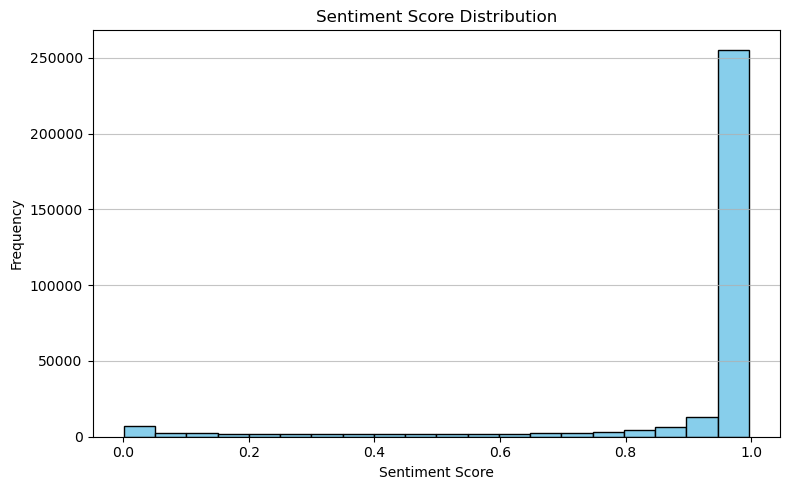

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlpmhp.csv"
df = pd.read_csv(file_path)

# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
from tqdm.auto import tqdm

# 1. Î™®Îç∏ Î°úÎìú
model_name = "nlp04/korean_sentiment_analysis_kcelectra"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("./data/review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv")
reviews = df['review'].tolist()

# 3. Í∞êÏ†ï Î∂ÑÏÑù
labels = []
scores = []

for text in tqdm(reviews, desc="Í∞êÏ†ï Î∂ÑÎ•ò Ï§ë"):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=300)
    with torch.no_grad():
        outputs = model(**inputs)

    probs = softmax(outputs.logits, dim=1)
    score = round(probs[0][1].item(), 2)       # Í∏çÏ†ï ÌôïÎ•† = Í∞êÏÑ± Ï†êÏàò
    label = int(torch.argmax(probs))           # 0=Î∂ÄÏ†ï, 1=Í∏çÏ†ï
    labels.append(label)
    scores.append(score)

# 4. Í≤∞Í≥º Ï†ÄÏû•
df["sentiment_label"] = labels
df["sentiment_score"] = scores
df.to_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlp04.csv", index=False)

print("üéâ Í∞êÏ†ï Î∂ÑÎ•ò ÏôÑÎ£å! ‚Üí 'sentiment_label', 'sentiment_score' Ïª¨Îüº Ï∂îÍ∞ÄÎê®")


Í∞êÏ†ï Î∂ÑÎ•ò Ï§ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 315753/315753 [3:14:28<00:00, 27.06it/s]  


üéâ Í∞êÏ†ï Î∂ÑÎ•ò ÏôÑÎ£å! ‚Üí 'sentiment_label', 'sentiment_score' Ïª¨Îüº Ï∂îÍ∞ÄÎê®


In [27]:
df_KcBert= pd.read_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_KcBert.csv")
df_KcBert['label'].value_counts()

label
0    195782
1    119971
Name: count, dtype: int64

In [26]:
df_KcBert['score'].describe()

count    315753.000000
mean          0.478115
std           0.069909
min           0.284000
25%           0.421500
50%           0.471000
75%           0.531900
max           0.772700
Name: score, dtype: float64

In [6]:
df_npl04= pd.read_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlp04.csv")
df_npl04['sentiment_label'].value_counts()

sentiment_label
0     212521
7      26012
1      25079
6      16422
4      15247
5      12248
9       6906
10       729
2        542
3         40
8          7
Name: count, dtype: int64

In [5]:
df_npl04['sentiment_score'].describe()

count    315753.000000
mean          0.166086
std           0.134188
min           0.000000
25%           0.070000
50%           0.140000
75%           0.240000
max           0.830000
Name: sentiment_score, dtype: float64

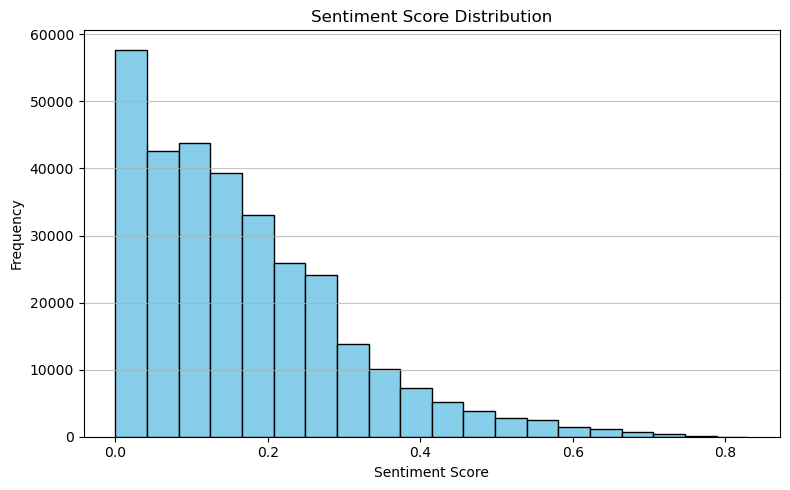

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlp04.csv"
df = pd.read_csv(file_path)

# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [ ]:
df_nlpmhp= pd.read_csv("./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlpmhp.csv")
df_nlpmhp['sentiment_score'].describe()

count    315753.000000
mean          0.905762
std           0.221423
min           0.001000
25%           0.969400
50%           0.986900
75%           0.991400
max           0.996200
Name: sentiment_score, dtype: float64

In [29]:
df_nlpmhp['sentiment_label'].value_counts()

sentiment_label
1    292455
0     23298
Name: count, dtype: int64

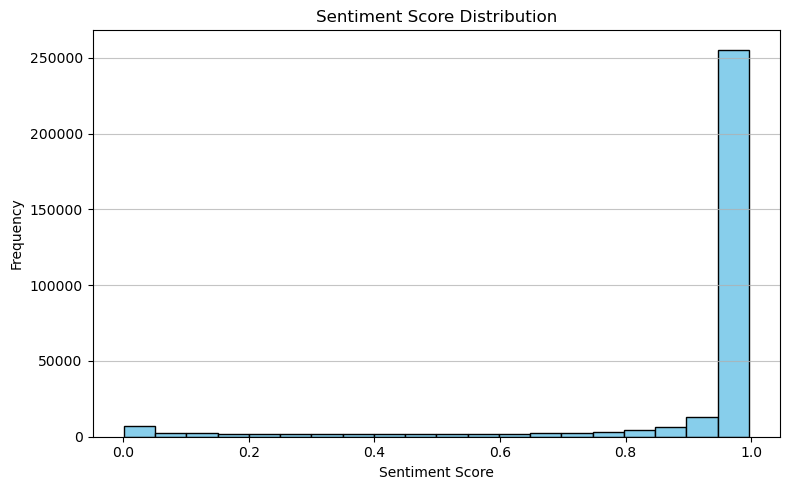

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_nlpmhp.csv"
df = pd.read_csv(file_path)

# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

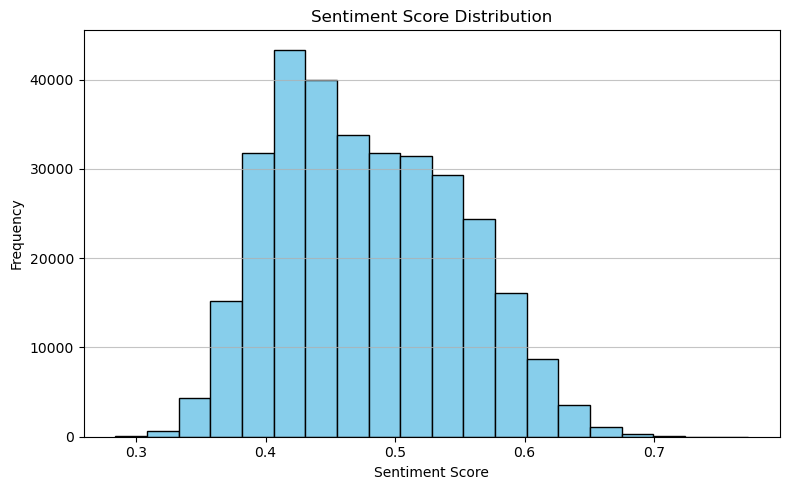

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./data/Í∞êÏ†ïÎ∂ÑÏÑùÍ≤∞Í≥º_KcBert.csv"
df = pd.read_csv(file_path)

# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [38]:
# 1. TF-IDF Ï†êÏàòÎ•º ÎîïÏÖîÎÑàÎ¶¨Î°ú Î≥ÄÌôò
import pandas as pd
import numpy as np

tfidf_df = pd.read_csv('./data/review_tf-idf.csv')
tagged_df = pd.read_csv('./data/tagged_review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv')

tfidf_dict = dict(zip(tfidf_df['word'], tfidf_df['tf-idf']))

# 2. Î¶¨Î∑∞Î≥Ñ Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò
def calculate_sentiment_score(tagged_text):
    try:
        words = tagged_text.strip("[]").replace("'", "").split(", ")
        tfidf_scores = [tfidf_dict[word] for word in words if word in tfidf_dict]
        if tfidf_scores:
            return round(sum(tfidf_scores) / len(tfidf_scores), 4)
        else:
            return 0.0
    except:
        return 0.0

# 3. Í∞Å Î¶¨Î∑∞Ïóê ÎåÄÌï¥ Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞
tagged_df['sentiment_score'] = tagged_df['tagged_review'].apply(calculate_sentiment_score)

# 4. Í≤∞Í≥º ÌôïÏù∏
tagged_df[['review', 'tagged_review', 'sentiment_score']].head()


review  \
0          Ìå®ÏÖò Í≥†ÏûêÏûÖÎãàÎã§. ÎåÄÏ∂© Ï∞∏Í≥†Îßå..Ìï¥Ï£ºÏÑ∏Ïöî. Ï≤≠Î∞îÏßÄÎ≥¥Îã§Îäî Ïä¨ÎûôÏä§Ïóê Îçî ÎÇòÏùÄÎìØ   
1  Ï≤òÏùå Ï£ºÎ¨∏ ÌñàÏùÑÎïå Î∞îÎûåÎπ†ÏßÄÎäîÏÜåÎ¶¨Í∞Ä Ïò§Î•∏Ï™Ω Ïã†Î∞úÏóêÏÑú ÎÑàÎ¨¥ ÎßéÏù¥ÎÇòÏÑú Í≤®ÌôòÏù¥ÎÇò ÌôòÎ∂àÏùÑ Ìïò...   
2                     Í∞ÄÏÑ±ÎπÑ Ï¢ãÏïÑÏöî. 265ÏãúÎäîÎç∞ 265. ÏΩ± ÎÅàÌïòÎ©¥ ÎèºÎÑ§Ïöî   
3                  Ï†ïÏû•Ïóê Ïã†ÏúºÎ†§Í≥† ÏÉÄÎäîÎç∞ ÌÅ¥ÎûòÏãùÌïú ÎäêÎÇåÏù¥ ÎÇòÏÑú ÎßàÏùåÏóê ÎìúÎÑ§Ïöî!   
4       ÌèâÏÜåÏóê 265Ïã†ÎäîÎç∞ 270ÏúºÎ°ú ÏÉÄÏäµÎãàÎã§. ÌôïÏã§Ìûà ÏÇ¨Ïù¥Ï¶àÍ∞Ä ÌÅ¨Í∏¥ ÌïòÎÑ§Ïöî ÏïÑÏâ¨ÏõåÏöî.   

                                       tagged_review  sentiment_score  
0  ['Ìå®ÏÖò', 'Í≥†Ïûê', 'ÎåÄÏ∂©', 'Ï∞∏Í≥†', 'Ìï¥Ï£ºÎã§', 'Ï≤≠Î∞îÏßÄ', 'Ïä¨ÎûôÏä§', ...           0.0018  
1  ['Ï≤òÏùå', 'Ï£ºÎ¨∏', 'Î∞îÎûå', 'Îπ†ÏßÄÎã§', 'ÏÜåÎ¶¨', 'Ïò§Î•∏Ï™Ω', 'Ïã†Î∞ú', '...           0.0114  
2                  ['Í∞ÄÏÑ±', 'ÎπÑ', 'Ï¢ãÎã§', 'ÏΩ±', 'ÎÅà', 'ÎèºÎã§']           0.0290  
3  ['Ï†ïÏû•', 'Ïã†Îã§', 'ÏÇ¨Îã§', 'ÌÅ¥ÎûòÏãù', 'ÎäêÎÇå', 'ÎÇòÏÑúÎã§', 'ÎßàÏùå', '...           0.0141  
4     ['ÌèâÏÜå', 'Ïã†Îã§', 'ÏÇ¨Îã§', 'ÌôïÏã§ÌïòÎã§', 'ÏÇ¨Ïù¥Ï¶à', 'ÌÅ¨Îã§', 'ÏïÑÏâΩÎã§']           0.0232

In [39]:
tagged_df['sentiment_score'].describe()

count    315753.000000
mean          0.019732
std           0.008287
min           0.000000
25%           0.014000
50%           0.018900
75%           0.024600
max           0.072400
Name: sentiment_score, dtype: float64

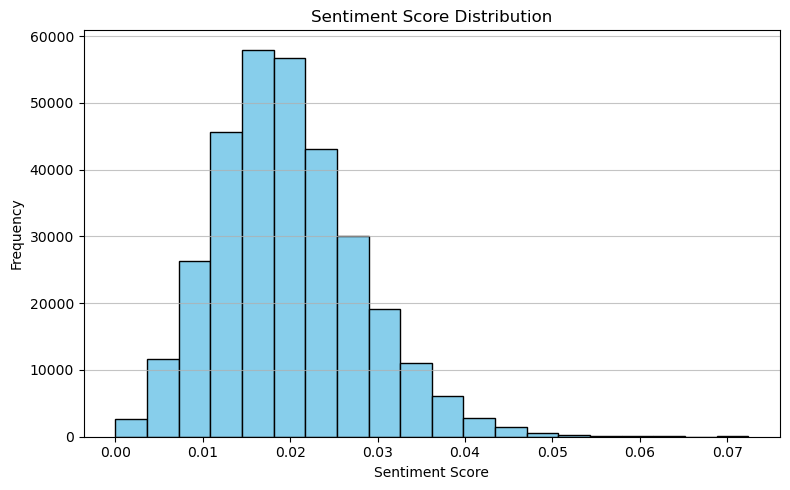

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(tagged_df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

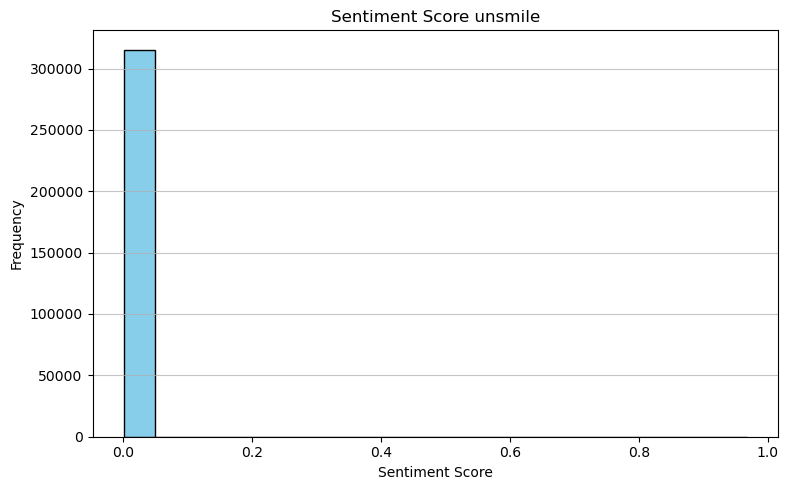

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./data/Í∞êÏ†ïÎ∂ÑÏÑù_Í≤∞Í≥º_unsmile.csv"
df = pd.read_csv(file_path)

# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(df['unsmile_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score unsmile')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

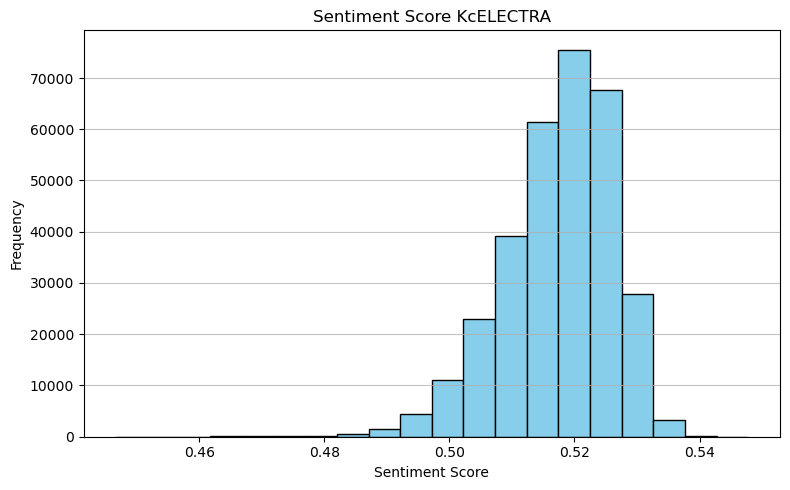

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./data/Í∞êÏ†ïÎ∂ÑÏÑù_Í≤∞Í≥º_KcELECTRA.csv"
df = pd.read_csv(file_path)

# sentiment_score Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score KcELECTRA')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### kc-bert(min-max, tanh)

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("./data/review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv")
reviews = df['review'].astype(str).tolist()

# 2. Î™®Îç∏ Î°úÎìú (KC-BERT for regression)
model_name = "beomi/kcbert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class KcBERTForRegression(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_output = outputs.last_hidden_state[:, 0]
        score = self.regressor(cls_output).squeeze(-1)
        return score

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = KcBERTForRegression(model_name).to(device)
model.eval()

# 3. Í∞êÏÑ± Ï†êÏàò ÏòàÏ∏°
scores = []

with torch.no_grad():
    for text in tqdm(reviews, desc="Í∞êÏÑ± Ï†êÏàò ÏòàÏ∏° Ï§ë"):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        output = model(**inputs)
        score = output.item()
        scores.append(score)

# 4. Min-Max Scaling ‚Üí tanh ‚Üí tanh(2x + 0.3)
score_series = pd.Series(scores)
min_val = score_series.min()
max_val = score_series.max()
minmax_scaled = (score_series - min_val) / (max_val - min_val)
mmt = np.tanh(minmax_scaled)
Sentiment_Score = np.tanh(2 * mmt + 0.3)

# 5. Í≤∞Í≥º Ï∂îÍ∞Ä
df['Sentiment_score'] = Sentiment_Score
df['Sentiment_label'] = (Sentiment_Score >= 0.5).astype(int)  # 0 or 1 ÎùºÎ≤®

# 6. Ï†ÄÏû•
output_path = "./data/Review_data_KcBERT.csv"
df.to_csv(output_path, index=False)

Í∞êÏÑ± Ï†êÏàò ÏòàÏ∏° Ï§ë:   1%|          | 1723/315753 [01:10<3:32:31, 24.63it/s]

In [2]:
from transformers import pipeline

pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

result = pipe("The shoes are wide and comfortable. I‚Äôll enjoy wearing them. Wishing you lots of sales!")
print(result)

Device set to use cpu


[{'label': 'Positive', 'score': 0.43775829672813416}]


In [15]:

from transformers import pipeline

pipe = pipeline(
    "text-classification",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    return_all_scores=True
)

text = """The soles came off just a month after I bought them, so I ended up throwing them away‚Ä¶ I'm really disappointed. Even though I got them at a low price, I didn‚Äôt wear them that many times in a month ‚Äî how does it make sense for the soles to fall apart like that? When they were first delivered, they even sent me mismatched sizes ‚Äî one was 280mm and the other 260mm. I had to go through several days of waiting just to finally get a proper pair in 280mm. And now, after barely wearing them, this happens. One of the photos shows the mismatched pair from the initial delivery, and the other shows how destroyed they are after just one month."""

result = pipe(text)
print(result)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
c:\Users\smhrd\AppData\Local\Programs\Orange\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1

[[{'label': 'negative', 'score': 0.8963890671730042}, {'label': 'neutral', 'score': 0.09599921852350235}, {'label': 'positive', 'score': 0.007611727342009544}]]


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# ÏßÑÏßú Ï≤òÏùåÏÇ¨Î≥¥ÎäîÎç∞ Îã§ÏùåÏóêÎäî Ï†àÎåÄ ÏïàÏÇ¨ÏïºÏßÄ ÎÑàÎ¨¥ Îî±Îî±ÌïòÎÑ§ [{'label': 'negative', 'score': 0.4293977618217468}]
# Î∞úÎ≥ºÎèÑ ÎÑìÍ≥† Ìé∏ÌïòÎÑ§Ïöî Ïûò Ïã†Í≤†ÏäµÎãàÎã§ ÎßéÏù¥ ÌååÏÑ∏Ïöî  [{'label': 'positive', 'score': 0.9260769486427307}]
# Î∞úÏùÄ ÏïÑÌîÑÏßÄÎßå Ïù¥ÏÅòÍ∏¥ ÏßÑÏßú Ïù¥ÎªêÏöî ÏûÖÎ¨∏Ïö© Í∞úÏù¥Îìù [{'label': 'positive', 'score': 0.7507539391517639}]
# Ï†ïÏÇ¨Ïù¥Ï¶à 250, Ïö¥ÎèôÌôî 255 Ïã†ÎäîÎç∞ 260Ïù¥ Îî± Ìé∏Ìï¥Ïöî. 250 Ï≤òÏùåÏóê Íµ¨Îß§ÌñàÎã§Í∞Ä Î∞úÏïÑÌçºÏÑú 260 ÍµêÌôòÌñàÎäîÎç∞ ÎÑàÎ¨¥ÎÑàÎ¨¥ Ïûò ÎßûÏäµÎãàÎã§.  [{'label': 'positive', 'score': 0.6997151374816895}]
# ÏÇ∞ÏßÄ ÌïúÎã¨ÎßåÏóê Î∞ëÏ∞Ω ÎúØÏñ¥Ï†∏ÏÑú Í∞ñÎã§ Î≤ÑÎ†∏Ïñ¥Ïöî .. Ïã§ÎßùÏù¥ Ï¢Ä ÌÅΩÎãàÎã§ Ïã∏Í≤åÏÉÄÎã§Ìï¥ÎèÑ ÌïúÎã¨ÎèôÏïà Î™á Î≤à Ïã†ÏßÄÎèÑ ÏïäÏïòÎäîÎç∞ Î∞ëÏ∞Ω ÎúØÍ∏∞Îäî Í≤å ÎßêÏù¥ÎêòÎÇòÏöî? Ï≤òÏùåÎ∞∞ÏÜ°Ïò¨ÎïåÎèÑ 280ÌïòÎÇòÎûë 260ÌïòÎÇò ÏßùÏû¨Í∏∞ Î≥¥ÎÇ¥Ï§òÏÑú Î∞òÌíàÏãúÌÇ§Î°ú Î™áÎÇ†Î™áÏùº Í∏∞Îã§Î†§ Í≤®Ïö∞ ÏñëÏ™Ω Îã§ 280 ÏÑ∏Ìä∏ Î∞õÏïòÎäîÎç∞ ÏñºÎßà Ïã†ÏßÄÎèÑ ÏïäÏïòÎäîÎç∞ Ï†ÄÎü∞ Íº¥ ÎÇòÎÑ§Ïöî. ÏÇ¨ÏßÑ ÌïòÎÇòÎäî Ï≤òÏùå Î∞∞ÏÜ° Îïå ÏßùÏßùÏù¥ Î∞∞ÏÜ° Ïò® ÏÇ¨ÏßÑÏù¥Í≥† Îã§Î•∏ ÏÇ¨ÏßÑÌïòÎÇòÎäî ÌïúÎã¨ÎßåÏóê ÏîπÏ∞ΩÎÇú ÏÇ¨ÏßÑÏûÖÎãàÎã§. [{'label': 'negative', 'score': 0.7566335797309875}]

result = pipe("The soles came off just a month after I bought them, so I ended up throwing them away‚Ä¶ I'm really disappointed. Even though I got them at a low price, I didn‚Äôt wear them that many times in a month ‚Äî how does it make sense for the soles to fall apart like that? When they were first delivered, they even sent me mismatched sizes ‚Äî one was 280mm and the other 260mm. I had to go through several days of waiting just to finally get a proper pair in 280mm. And now, after barely wearing them, this happens. One of the photos shows the mismatched pair from the initial delivery, and the other shows how destroyed they are after just one month.")
print(result)

Device set to use cpu


[{'label': 'negative', 'score': 0.7566335797309875}]


In [19]:
%pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


In [15]:
import json
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, BertConfig, BertPreTrainedModel, get_scheduler
from torch.optim import AdamW
import torch.nn as nn
from tqdm import tqdm

# 1. Í∞êÏÑ±ÏÇ¨Ï†Ñ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÎîïÏÖîÎÑàÎ¶¨Î°ú Î≥ÄÌôò
with open("./data/SentiWord_info.json", "r", encoding="utf-8") as f:
    senti_list = json.load(f)

senti_dict = {
    item["word"]: float(item["polarity"])
    for item in senti_list
    if "word" in item and "polarity" in item
}

# Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def get_sentiment_score(text):
    scores = []
    for word in text.split():
        score = senti_dict.get(word)
        if score is not None:
            scores.append(score)
    return np.mean(scores) if scores else 0.0

# 2. Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∞êÏÑ± Ï†êÏàò Îß§Ìïë
df = pd.read_csv("./data/review_data_Ï†ÑÏ≤¥Ïã†Î∞ú.csv")
df["score"] = df["review"].astype(str).apply(get_sentiment_score)

# 3. Dataset Ï†ïÏùò
class ReviewDataset(Dataset):
    def __init__(self, texts, scores, tokenizer, max_len=128):
        self.texts = texts
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encodings = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt",
        )
        input_ids = encodings["input_ids"].squeeze(0)
        attention_mask = encodings["attention_mask"].squeeze(0)
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "score": torch.tensor(self.scores[idx], dtype=torch.float),
        }

# 4. KC-BERT ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
class BertForRegression(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        self.regressor = nn.Linear(config.hidden_size, 1)
        self.init_weights()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        score = self.regressor(pooled_output)
        return score.squeeze(-1)

# 5. Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model_name = "beomi/kcbert-base"
tokenizer = BertTokenizer.from_pretrained(model_name)
config = BertConfig.from_pretrained(model_name)
model = BertForRegression.from_pretrained(model_name, config=config)

# 6. ÌïôÏäµ ÏÑ∏ÌåÖ
train_dataset = ReviewDataset(df["review"].tolist(), df["score"].tolist(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

optimizer = AdamW(model.parameters(), lr=2e-5)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 30
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 7. ÌïôÏäµ Î£®ÌîÑ (Epoch = 30)
for epoch in range(30):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/30"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["score"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = nn.MSELoss()(outputs, labels)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")

# 8. Î™®Îç∏ Ï†ÄÏû•
model.save_pretrained("./kcbert_regression_model")
tokenizer.save_pretrained("./kcbert_regression_model")


Some weights of BertForRegression were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['regressor.bias', 'regressor.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/30:   8%|‚ñä         | 1603/19735 [1:41:36<19:09:20,  3.80s/it]


KeyboardInterrupt: 

In [ ]:
import torch
from transformers import BertTokenizer, BertConfig
from torch import nn
from transformers import BertModel

# 1. ÌöåÍ∑ÄÏö© KC-BERT Î™®Îç∏ Ï†ïÏùò (ÌïôÏäµ ÎïåÏôÄ ÎòëÍ∞ôÏù¥)
class BertForRegression(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        score = self.regressor(pooled_output)
        return score.squeeze(-1)

# 2. Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î∂àÎü¨Ïò§Í∏∞
model_path = "./kcbert_regression_model"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForRegression(model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 3. ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def predict_sentiment_score(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    with torch.no_grad():
        output = model(**inputs)
        score = output.item()
    return round(score, 4)

# 4. ÌÖåÏä§Ìä∏ ÏòàÏãú
test_review = "Î∞∞ÏÜ°Ïù¥ Îπ†Î•¥Í≥† ÎÑàÎ¨¥ ÎßåÏ°±Ïä§Îü¨ÏõåÏöî!"
predicted_score = predict_sentiment_score(test_review)
print(f"Í∞êÏÑ± Ï†êÏàò: {predicted_score}")
